In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic.csv


In [3]:
import io
data=pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [5]:
x = data.drop('Survived',axis='columns')
y = data.Survived

In [6]:
x.Sex = x.Sex.map({'male': 1, 'female': 2})

In [7]:
x.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [8]:
import math
mean_age=x.Age.mean()
mean_age=math.floor(mean_age)
print(mean_age)
x.Age=x.Age.fillna(mean_age)
x.Age

29


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### **Data Splitting into train and test**

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,Pclass,Sex,Age,Fare
318,1,2,31.0,164.8667
719,3,1,33.0,7.7750
174,1,1,56.0,30.6958
169,3,1,28.0,56.4958
391,3,1,21.0,7.7958
...,...,...,...,...
617,3,2,26.0,16.1000
599,1,1,49.0,56.9292
357,2,2,38.0,13.0000
0,3,1,22.0,7.2500


### **Model Training**

In [10]:
from sklearn.ensemble import AdaBoostClassifier
AdaModel=AdaBoostClassifier(n_estimators=100,learning_rate=1)
model=AdaModel.fit(x_train,y_train)
model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

### **Model Accuracy**

In [11]:
model.score(x_test,y_test)

0.7597765363128491

In [12]:
y_predicted=model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[93, 20],
       [23, 43]])

Text(69.0, 0.5, 'Truth')

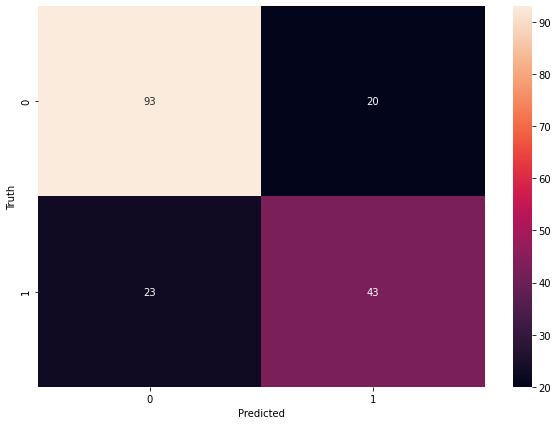

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')